## Modelos de regresion lineal

* Y= a +B*x
* X: 100 Valores Distribuidos N(1.5 , 2.5)        media=1.5 DT=2.5  
* Ye: 5 +1.9*x  +e 
* e estará distribuida segun una DN N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Crear  una array de datos que siga una Distribucion normal 
x= 1.5 +2.5*np.random.randn(100)
#Residuos o errores siguen otra distribución Normal
res=0 +0.8*np.random.randn(100)


In [3]:
y_pred=5+1.9*x


In [4]:
y_act=5 + 1.9*x+res

In [5]:
# Para crear un DF se convierten de array a listas
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()


In [6]:
y_mean=[np.mean(y_act) for i in range (1,len(x_list)+1)]
                                       

In [7]:
data= pd.DataFrame (
    {
        "x":     x_list,
        "y_actual":     y_act_list,
        "y_prediccion":y_pred_list
    
    }
)

data

,x,y_actual,y_prediccion
0,-1.405618,0.732558,2.329326
1,-2.248618,1.668005,0.727625
2,2.205230,9.160822,9.189938
3,-0.130872,5.244277,4.751344
4,-2.453379,0.760633,0.338580
...,...,...,...
95,0.780003,5.747392,6.482006
96,0.905072,6.175515,6.719637
97,4.183510,13.850754,12.948668
98,1.097872,6.637726,7.085957


In [8]:
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['figure.figsize'] = [10, 10]

Text(0.5, 1.0, 'Estudio de Regresion Lineal')

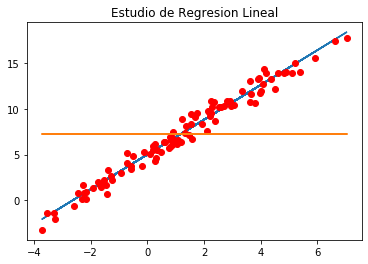

In [9]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, 'ro')
plt.plot(x,y_mean)
plt.title("Estudio de Regresion Lineal")


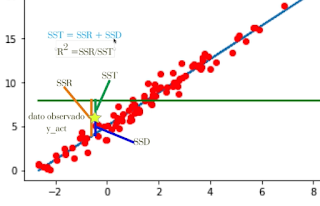

In [10]:

Image("../src/img/errores_sumas.png")

### Conceptos de error para medir la calidad del modelo
* SSD: Suma de cuadrados de las diferencias Separacion entre el modelo y el dato observado
* SST: Suma de cuadrados totales: Separación entre la media y el dato
* SSR: Suma de cuadrados de la regresion: DIferencia total entre la media y el valor del modelo
SSR Es explicada por el modelo
SST Es el error total del modelo
* SST= SSR+ SSD 
#### SSR sea Grande y SSD Pequeño
* se busca que SSR sea parecido a SST.  y eso se define con R2

* R2=SSR/SST


In [11]:
data['SSR']=(data['y_prediccion']-np.mean(y_act))**2
data['SSD']=(data['y_prediccion']-data['y_actual'])**2
data['SST']=(data['y_actual']-np.mean(y_act))**2
data.head()





,x,y_actual,y_prediccion,SSR,SSD,SST
0,-1.405618,0.732558,2.329326,24.506363,2.549667,42.865276
1,-2.248618,1.668005,0.727625,42.929891,0.884313,31.491304
2,2.205230,9.160822,9.189938,3.648947,0.000848,3.538559
3,-0.130872,5.244277,4.751344,6.392665,0.242983,4.143012
4,-2.453379,0.760633,0.338580,48.179368,0.178129,42.498445


In [12]:
SSR=sum(data['SSR'])
SSR

2154.2536142707927

In [13]:
SSD=sum(data['SSD'])
SSD

55.467025057311545

In [14]:
SST=sum(data['SST'])
SST

2212.1193234914504

In [15]:
R2=SSR/SST
R2

0.973841506375286

(array([ 6.,  4., 10., 12., 17., 16., 12., 13.,  6.,  4.]),
 array([-1.53506841, -1.2218848 , -0.90870119, -0.59551759, -0.28233398,
         0.03084963,  0.34403323,  0.65721684,  0.97040045,  1.28358406,
         1.59676766]),
 <a list of 10 Patch objects>)

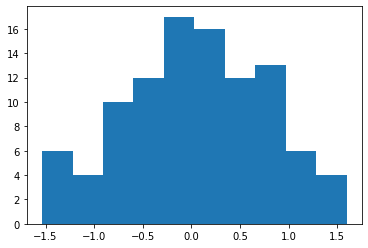

In [16]:
plt.hist(data['y_prediccion']-data['y_actual'])